# Generate synthetic data

In [ ]:
pip install sdv

## Reference distributions

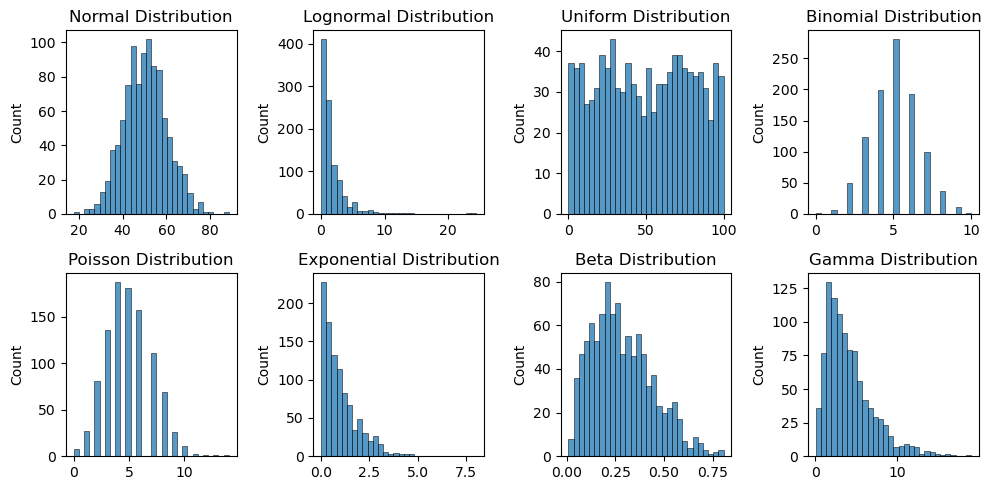

In [268]:
# Normal
mean = 50
std = 10
normal_data = np.random.normal(loc=mean, scale=std, size=1000)

# Lognormal
mean = 0
sigma = 1
lognormal_data = np.random.lognormal(mean=mean, sigma=sigma, size=1000)

# Uniform
low = 0
high = 100
uniform_data = np.random.uniform(low=low, high=high, size=1000)

# Binomial
n_trials = 10
p_success = 0.5
binomial_data = np.random.binomial(n=n_trials, p=p_success, size=1000)

# Poisson
lam = 5
poisson_data = np.random.poisson(lam=lam, size=1000)

# Exponential
scale = 1.0  # 1/lambda
exponential_data = np.random.exponential(scale=scale, size=1000)

# Beta
alpha = 2
beta = 5
beta_data = np.random.beta(a=alpha, b=beta, size=1000)

# Gamma
shape = 2
scale = 2
gamma_data = np.random.gamma(shape=shape, scale=scale, size=1000)

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(10, 5))

# Plot each distribution
sns.histplot(normal_data, bins=30, kde=False, ax=axs[0, 0]).set(title='Normal Distribution')
sns.histplot(lognormal_data, bins=30, kde=False, ax=axs[0, 1]).set(title='Lognormal Distribution')
sns.histplot(uniform_data, bins=30, kde=False, ax=axs[0, 2]).set(title='Uniform Distribution')
sns.histplot(binomial_data, bins=30, kde=False, ax=axs[0, 3]).set(title='Binomial Distribution')
sns.histplot(poisson_data, bins=30, kde=False, ax=axs[1, 0]).set(title='Poisson Distribution')
sns.histplot(exponential_data, bins=30, kde=False, ax=axs[1, 1]).set(title='Exponential Distribution')
sns.histplot(beta_data, bins=30, kde=False, ax=axs[1, 2]).set(title='Beta Distribution')
sns.histplot(gamma_data, bins=30, kde=False, ax=axs[1, 3]).set(title='Gamma Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


## Generate features

In [294]:
import numpy as np
import pandas as pd
#from sdv.tabular import GaussianCopula

# Define the number of samples
num_samples = 10000
np.random.seed(42)

### Demographics

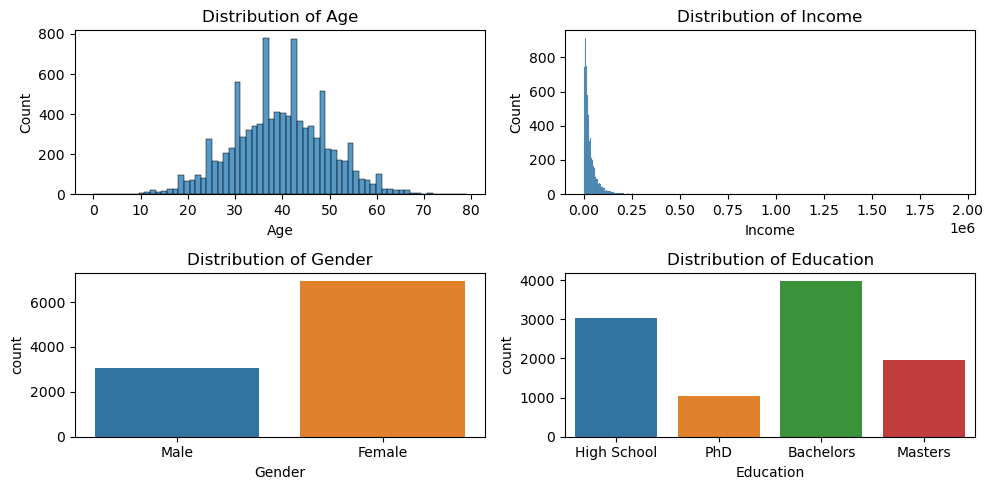

In [295]:
# Demographic variables

### Continous
# Age
ages = np.random.normal(loc=40, scale=10, size=num_samples).astype(int)

# Income
incomes = np.random.lognormal(mean=10, sigma=1, size=num_samples).astype(int)

### Categorical
# Gender
gender_values = ['Male', 'Female']
gender_probs = [0.3, 0.7]
genders = np.random.choice(gender_values, size=num_samples, p=gender_probs)

# Education levels
education_values = ['High School', 'Bachelors', 'Masters', 'PhD']
education_probs = [0.3, 0.4, 0.2, 0.1]  # Example probabilities
education_levels = np.random.choice(education_values, size=num_samples, p=education_probs)

###
# Create DataFrame
df_demographics = pd.DataFrame({
    'Age': ages,
    'Income': incomes,
    'Gender': genders,
    'Education': education_levels
})

###
# Plotting the distributions
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
sns.histplot(df_demographics['Age'])
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df_demographics['Income'])
plt.title('Distribution of Income')

plt.subplot(2, 2, 3)
sns.countplot(x='Gender', data=df_demographics)
plt.title('Distribution of Gender')

plt.subplot(2, 2, 4)
sns.countplot(x='Education', data=df_demographics)
plt.title('Distribution of Education')

plt.tight_layout()
plt.show()

## Ingredients: related to demographics

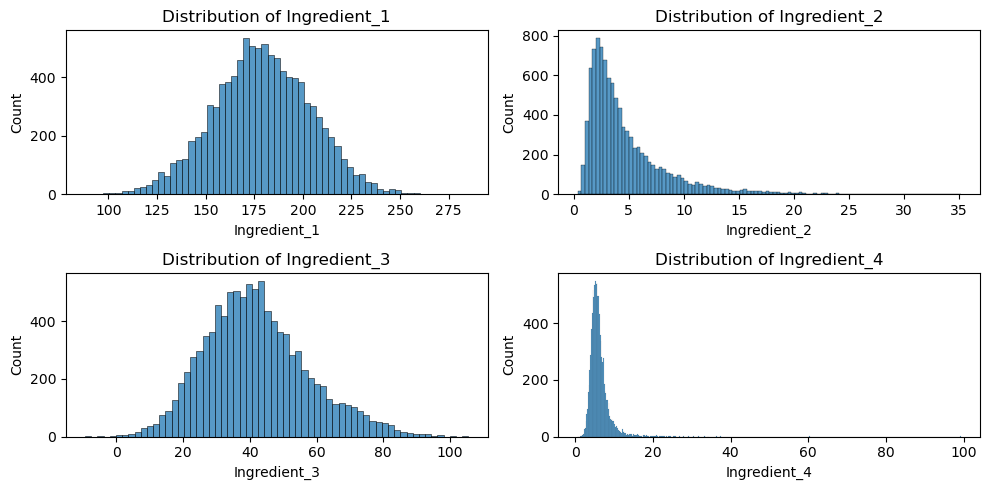

In [296]:
# Ingredient distributions

# Ingredient_1 related to age
ingredient_1 = np.random.normal(loc=100, scale=15, size=num_samples) + (ages * 2)

# Ingredient_2 based related to gender
mean_male = 2.0
sigma_male = 0.5
mean_female = 1.0
sigma_female = 0.5

ingredient_2_male = np.random.lognormal(mean=mean_male, sigma=sigma_male, size=num_samples)
ingredient_2_female = np.random.lognormal(mean=mean_female, sigma=sigma_female, size=num_samples)
ingredient_2 = np.where(genders == 'Male', ingredient_2_male, ingredient_2_female)

# Ingredient_3 based on educational level
mean_high_school = 30
sigma_high_school = 10
mean_bachelors = 40
sigma_bachelors = 10
mean_masters = 50
sigma_masters = 10
mean_phd = 70
sigma_phd = 10

ingredient_3_high_school = np.random.normal(loc=mean_high_school, scale=sigma_high_school, size=num_samples)
ingredient_3_bachelors = np.random.normal(loc=mean_bachelors, scale=sigma_bachelors, size=num_samples)
ingredient_3_masters = np.random.normal(loc=mean_masters, scale=sigma_masters, size=num_samples)
ingredient_3_phd = np.random.normal(loc=mean_phd, scale=sigma_phd, size=num_samples)

# Combine ingredient_3 based on educational level
ingredient_3 = np.select(
    [
        education_levels == 'High School', 
        education_levels == 'Bachelors', 
        education_levels == 'Masters', 
        education_levels == 'PhD'
    ], 
    [
        ingredient_3_high_school, 
        ingredient_3_bachelors, 
        ingredient_3_masters, 
        ingredient_3_phd
    ]
)

# Ingredient 4 is a mix of age and income
ingredient_4 = np.random.beta(a=3, b=5, size=num_samples) + (ages * 0.1) + (incomes * 0.00005)

# Create a DataFrame for ingredients
df_ingredients = pd.DataFrame({
    'Ingredient_1': ingredient_1,
    'Ingredient_2': ingredient_2,
    'Ingredient_3': ingredient_3,
    'Ingredient_4': ingredient_4
})

# Plotting the distributions
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
sns.histplot(df_ingredients['Ingredient_1'], kde=False)
plt.title('Distribution of Ingredient_1')

plt.subplot(2, 2, 2)
sns.histplot(df_ingredients['Ingredient_2'], kde=False)
plt.title('Distribution of Ingredient_2')

plt.subplot(2, 2, 3)
sns.histplot(df_ingredients['Ingredient_3'], kde=False)
plt.title('Distribution of Ingredient_3')

plt.subplot(2, 2, 4)
sns.histplot(df_ingredients['Ingredient_4'], kde=False)
plt.title('Distribution of Ingredient_4')

plt.tight_layout()
plt.show()

In [297]:
# Combine demographic and ingredient data
df_combined = pd.concat([df_demographics, df_ingredients], axis=1)

# Add an identifier column
df_combined['ID'] = df_combined.index

df_combined.head()


Age  Income  Gender    Education  Ingredient_1  Ingredient_2  Ingredient_3  \
0   44   11175    Male  High School    169.811788     10.974203     31.119300   
1   38   16228  Female          PhD    172.852825      5.801342     72.367909   
2   46   12120  Female    Bachelors    211.569849      2.422769     54.890213   
3   55   24597  Female    Bachelors    217.601536      2.872227     38.358372   
4   37   72924  Female          PhD    155.412571      1.660768     65.652572   

   Ingredient_4  ID  
0      5.029251   0  
1      4.792654   1  
2      5.802767   2  
3      6.936389   3  
4      7.498635   4

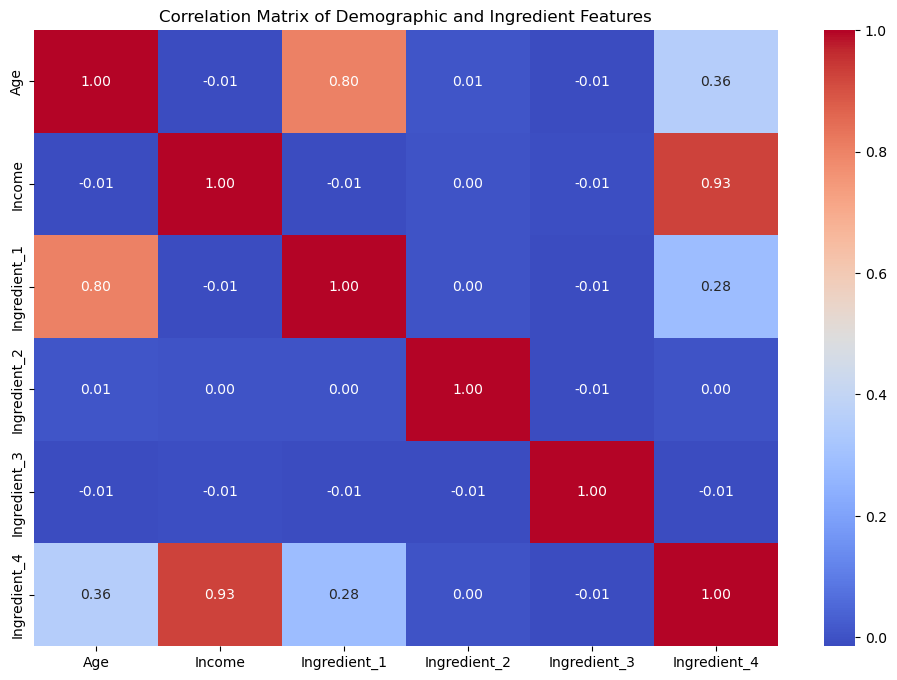

c:\Users\pabma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


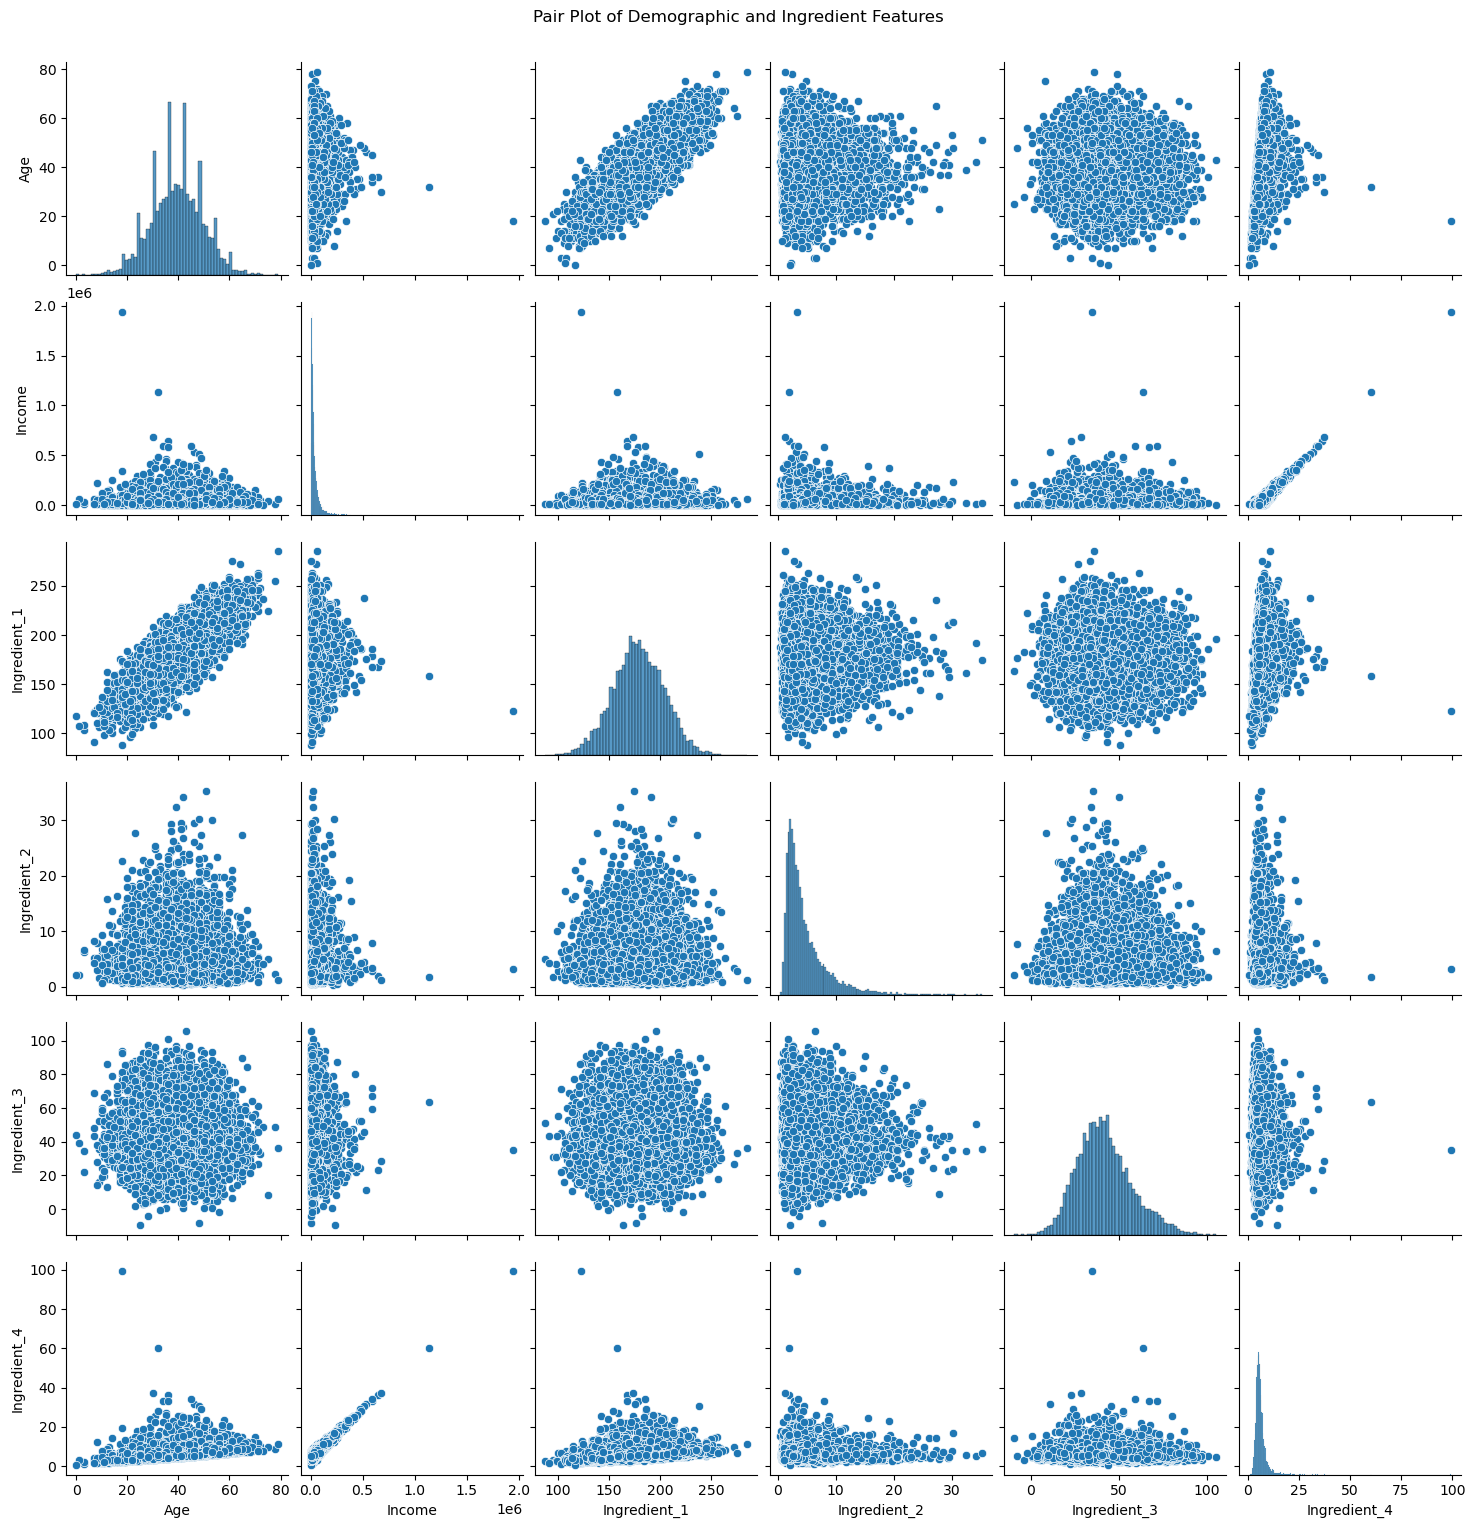

c:\Users\pabma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


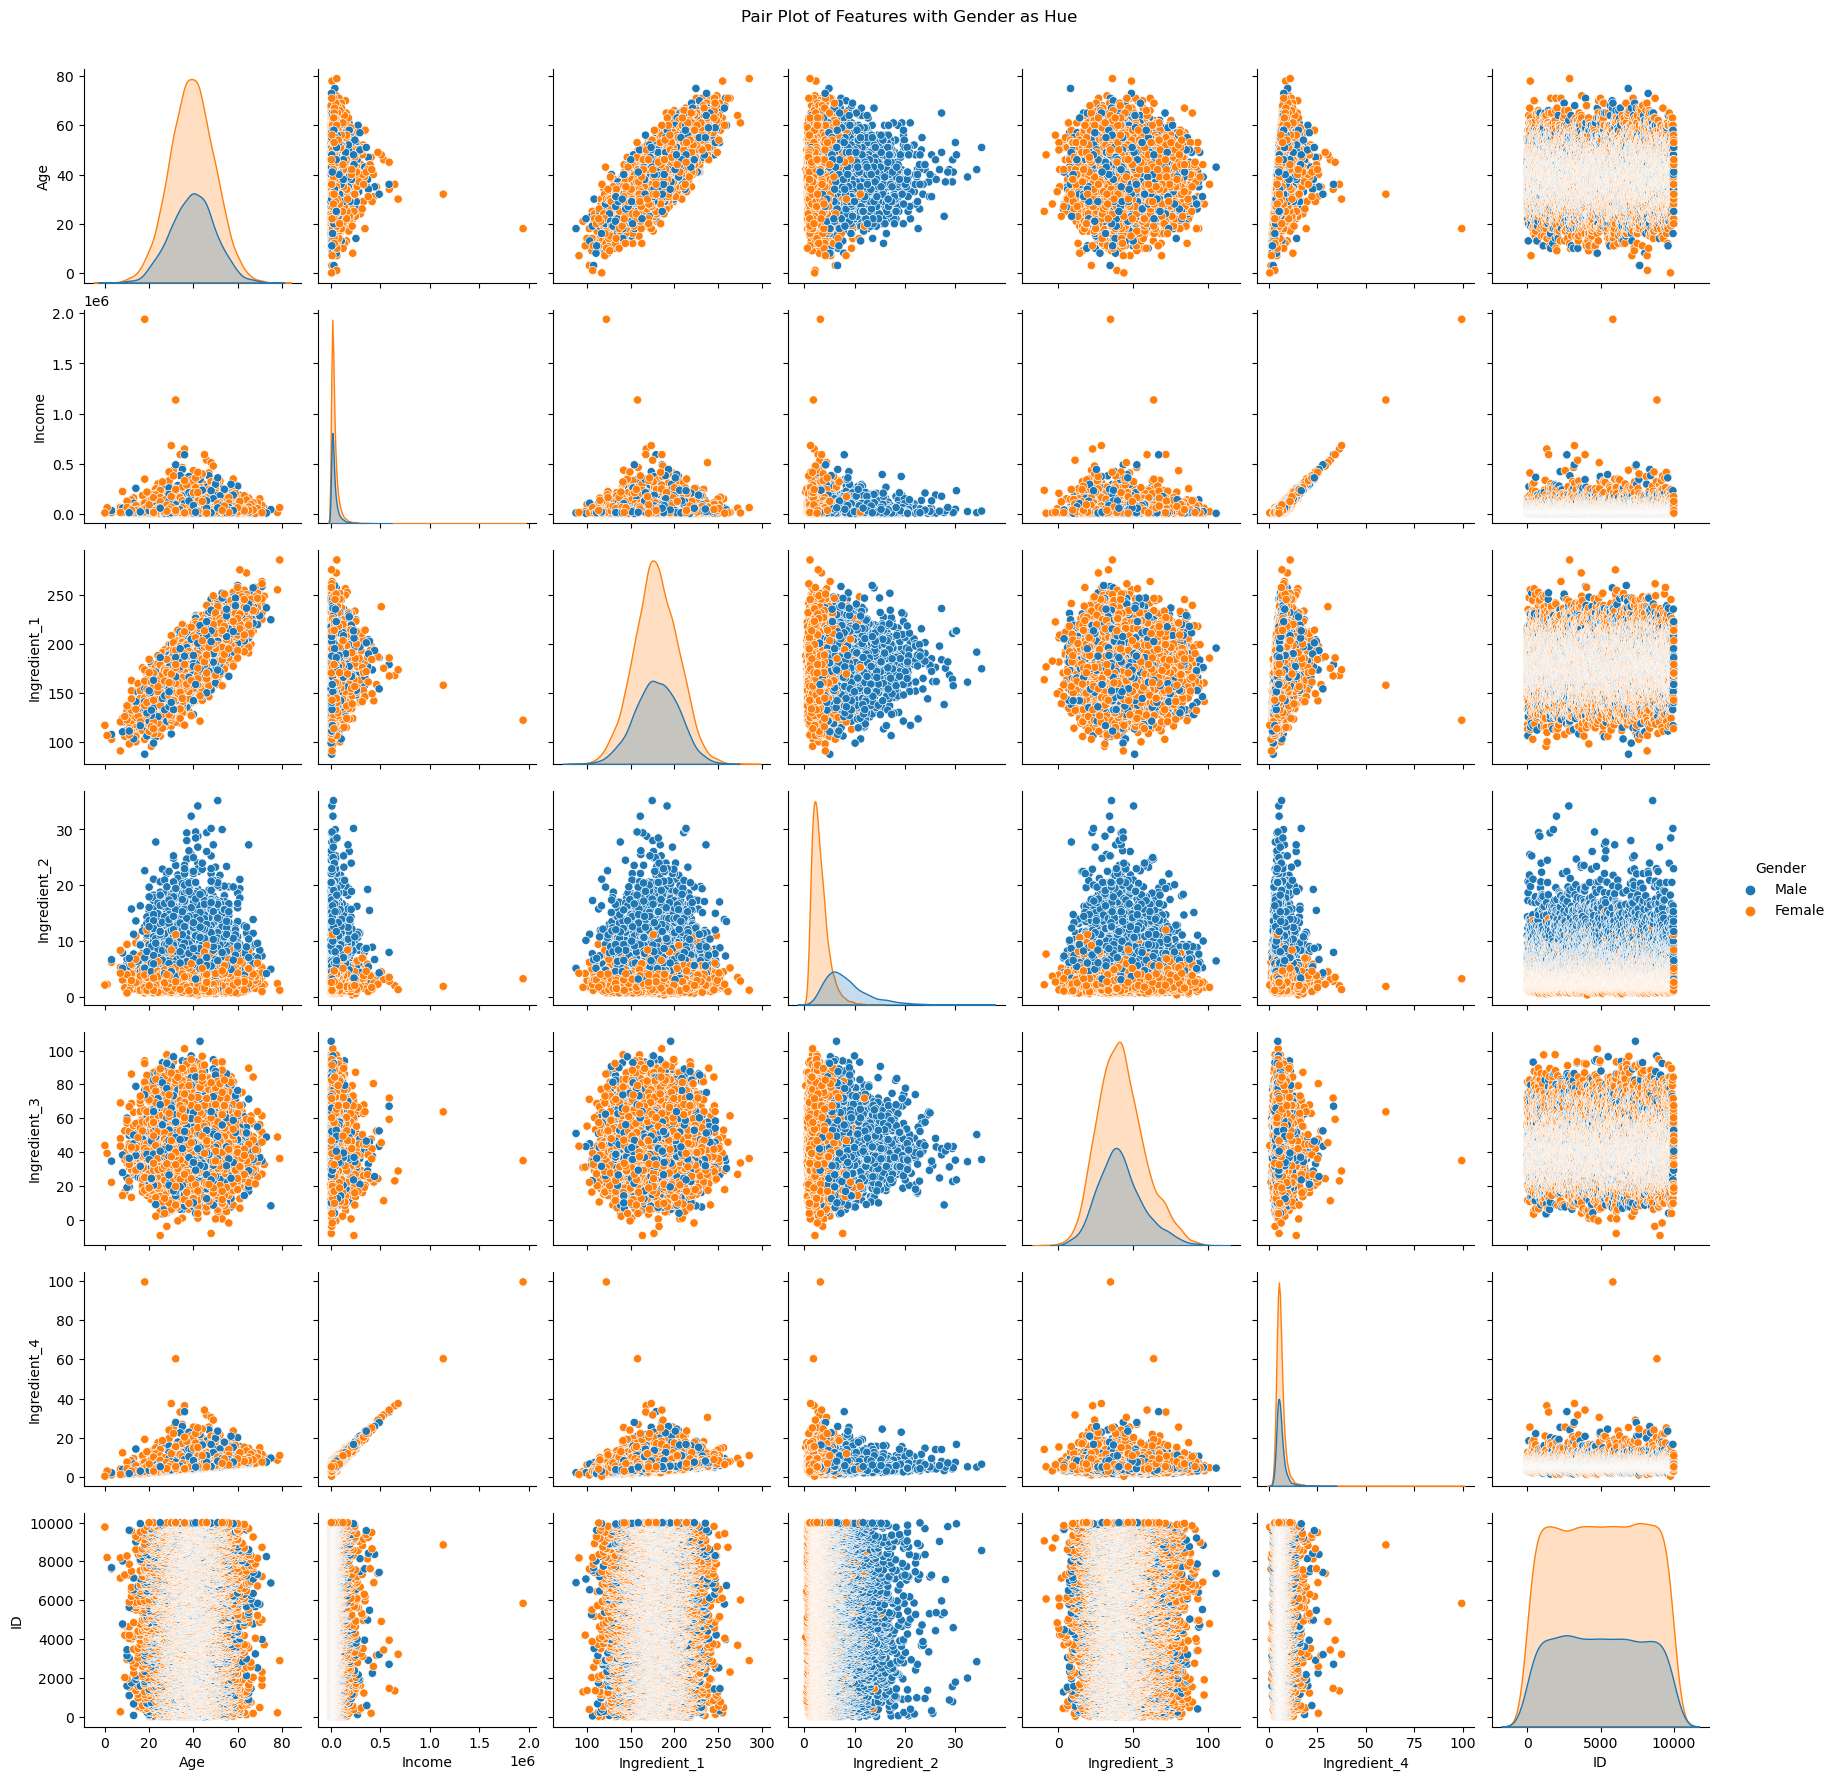

c:\Users\pabma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


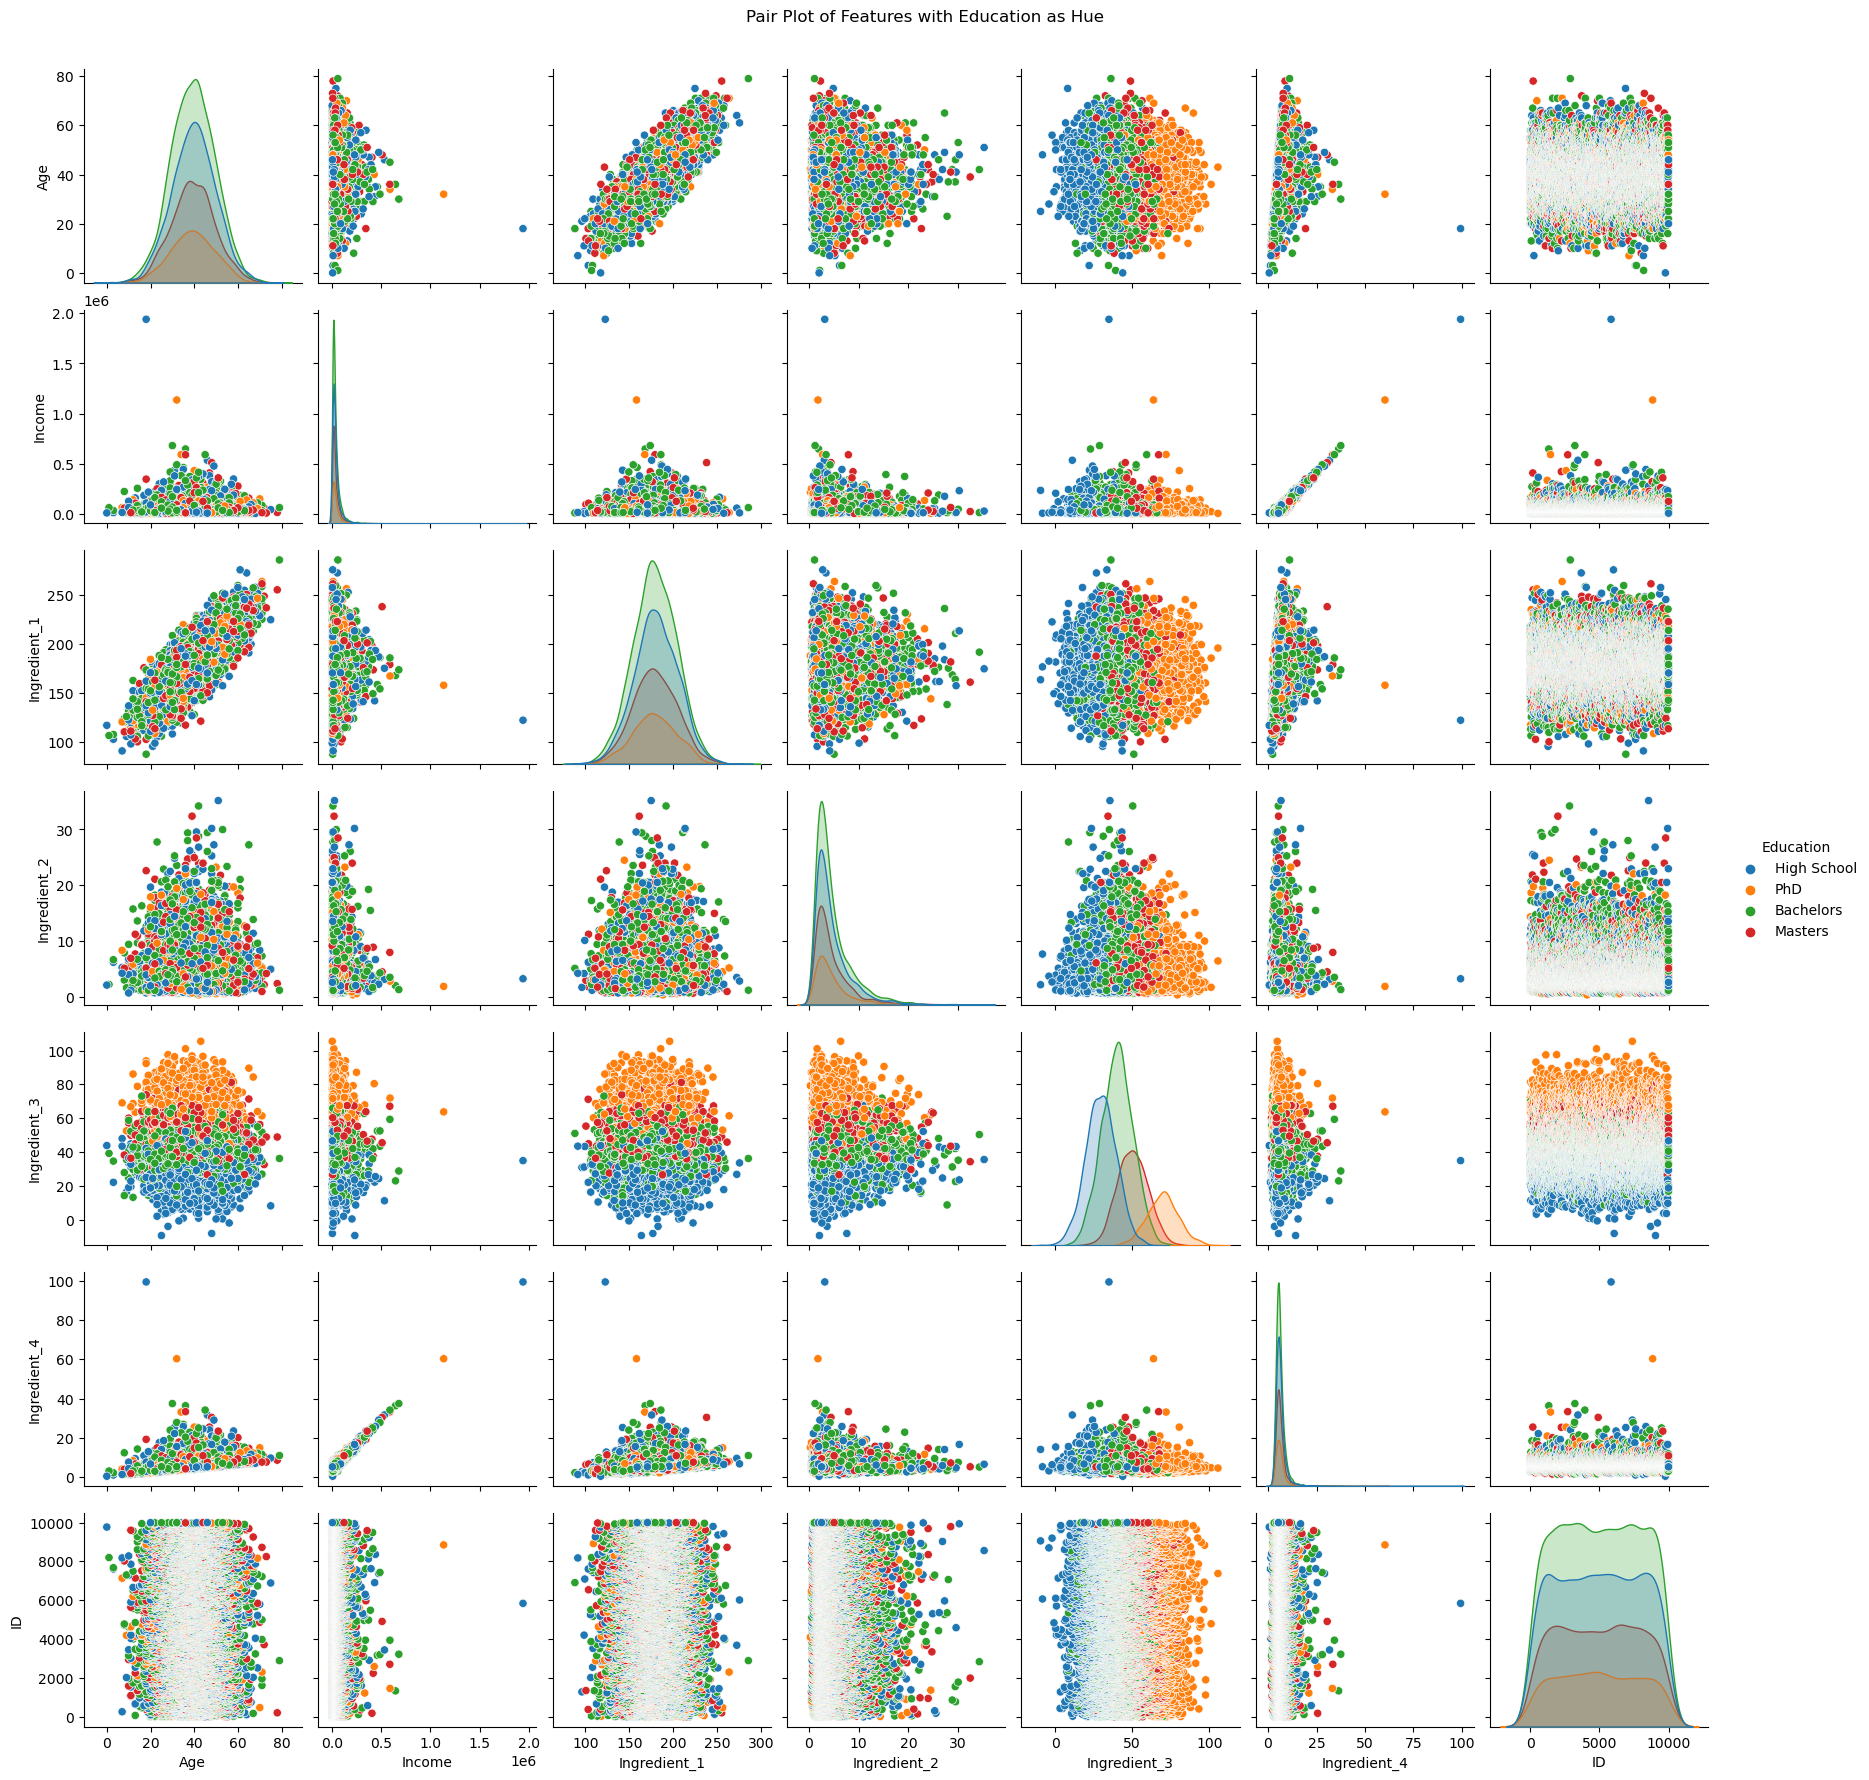

In [300]:
# conjoint distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude categorical columns
numerical_cols = df_combined.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop('ID')
df_numerical = df_combined[numerical_cols]



# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df_numerical.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Demographic and Ingredient Features')
plt.show()

# Pair plot
sns.pairplot(df_numerical)
plt.suptitle('Pair Plot of Demographic and Ingredient Features', y=1.02)
plt.show()

# Pair plot with Gender as hue
sns.pairplot(df_combined, hue='Gender')
plt.suptitle('Pair Plot of Features with Gender as Hue', y=1.02)
plt.show()

# Pair plot with Education as hue
sns.pairplot(df_combined, hue='Education')
plt.suptitle('Pair Plot of Features with Education as Hue', y=1.02)
plt.show()

# Calibrating model to predict ingredient levels

In [301]:
df_combined.head()

Age  Income  Gender    Education  Ingredient_1  Ingredient_2  Ingredient_3  \
0   44   11175    Male  High School    169.811788     10.974203     31.119300   
1   38   16228  Female          PhD    172.852825      5.801342     72.367909   
2   46   12120  Female    Bachelors    211.569849      2.422769     54.890213   
3   55   24597  Female    Bachelors    217.601536      2.872227     38.358372   
4   37   72924  Female          PhD    155.412571      1.660768     65.652572   

   Ingredient_4  ID  
0      5.029251   0  
1      4.792654   1  
2      5.802767   2  
3      6.936389   3  
4      7.498635   4

## General Preprocessing

In [309]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Convert categorical variables to numeric format using one-hot encoding
df_processed = pd.get_dummies(df_combined, columns=['Gender', 'Education'], drop_first=True)


In [327]:
# List of ingredients
ingredients = ['Ingredient_1', 'Ingredient_2', 'Ingredient_3', 'Ingredient_4']

# Separate independent and dependent variables
X = df_processed.drop(columns=ingredients + ['ID']) # all expect ingredients
y = df_processed[ingredients]

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X_scaled, y.values, df_combined.index, test_size=0.3, random_state=42)


In [333]:
X.head()

Age  Income  Gender_Male  Education_High School  Education_Masters  \
0   44   11175         True                   True              False   
1   38   16228        False                  False              False   
2   46   12120        False                  False              False   
3   55   24597        False                  False              False   
4   37   72924        False                  False              False   

   Education_PhD  
0          False  
1           True  
2          False  
3          False  
4           True

In [334]:
# Functions to train, evaluate and visualize results

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to train the model
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return model, y_train_pred, y_test_pred

# Function to evaluate and visualize model performance
def evaluate_and_visualize_model(y_train, y_train_pred, y_test, y_test_pred, ingredient_names):
    # Evaluate the model on the training set
    train_mse = mean_squared_error(y_train, y_train_pred, multioutput='raw_values')
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred, multioutput='variance_weighted')
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

    print('Training Mean Squared Error for each ingredient:', train_mse)
    print('Training Root Mean Squared Error for each ingredient:', train_rmse)
    print('Training Mean Absolute Percentage Error:', train_mape)
    print('Training R^2 Score:', train_r2)

    # Evaluate the model on the test set
    test_mse = mean_squared_error(y_test, y_test_pred, multioutput='raw_values')
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred, multioutput='variance_weighted')
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    print('Test Mean Squared Error for each ingredient:', test_mse)
    print('Test Root Mean Squared Error for each ingredient:', test_rmse)
    print('Test Mean Absolute Percentage Error:', test_mape)
    print('Test R^2 Score:', test_r2)

    # Visualize Actual vs Predicted values with additional metrics
    plt.figure(figsize=(14, 10))

    for i, ingredient in enumerate(ingredient_names):
        plt.subplot(2, 2, i+1)
        plt.scatter(y_test[:, i], y_test_pred[:, i], alpha=0.3)
        plt.plot([y_test[:, i].min(), y_test[:, i].max()], [y_test[:, i].min(), y_test[:, i].max()], 'k--', lw=2)

        # Calculate additional metrics for the test set
        correlation = np.corrcoef(y_test[:, i], y_test_pred[:, i])[0, 1]
        rmse_individual = np.sqrt(mean_squared_error(y_test[:, i], y_test_pred[:, i]))
        mape_individual = mean_absolute_percentage_error(y_test[:, i], y_test_pred[:, i])

        # Annotate the plot with metrics
        plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.90, f'RMSE: {rmse_individual:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.85, f'MAPE: {mape_individual:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

        plt.xlabel(f'Actual {ingredient}')
        plt.ylabel(f'Predicted {ingredient}')
        plt.title(f'Actual vs Predicted {ingredient}')

    plt.tight_layout()
    plt.show()

## Linear Regression

Linear Regression Model
Training Mean Squared Error for each ingredient: [2.14299357e+02 7.96032688e+00 1.00071182e+02 2.59232541e-02]
Training Root Mean Squared Error for each ingredient: [14.63896708  2.82140512 10.00355845  0.161007  ]
Training Mean Absolute Percentage Error: 22.03525038416631
Training R^2 Score: 0.6295689179817725
Test Mean Squared Error for each ingredient: [2.32044346e+02 7.77629993e+00 1.03885643e+02 2.61639129e-02]
Test Root Mean Squared Error for each ingredient: [15.23300188  2.78860179 10.19243069  0.16175263]
Test Mean Absolute Percentage Error: 22.237100043826004
Test R^2 Score: 0.6189201262227477


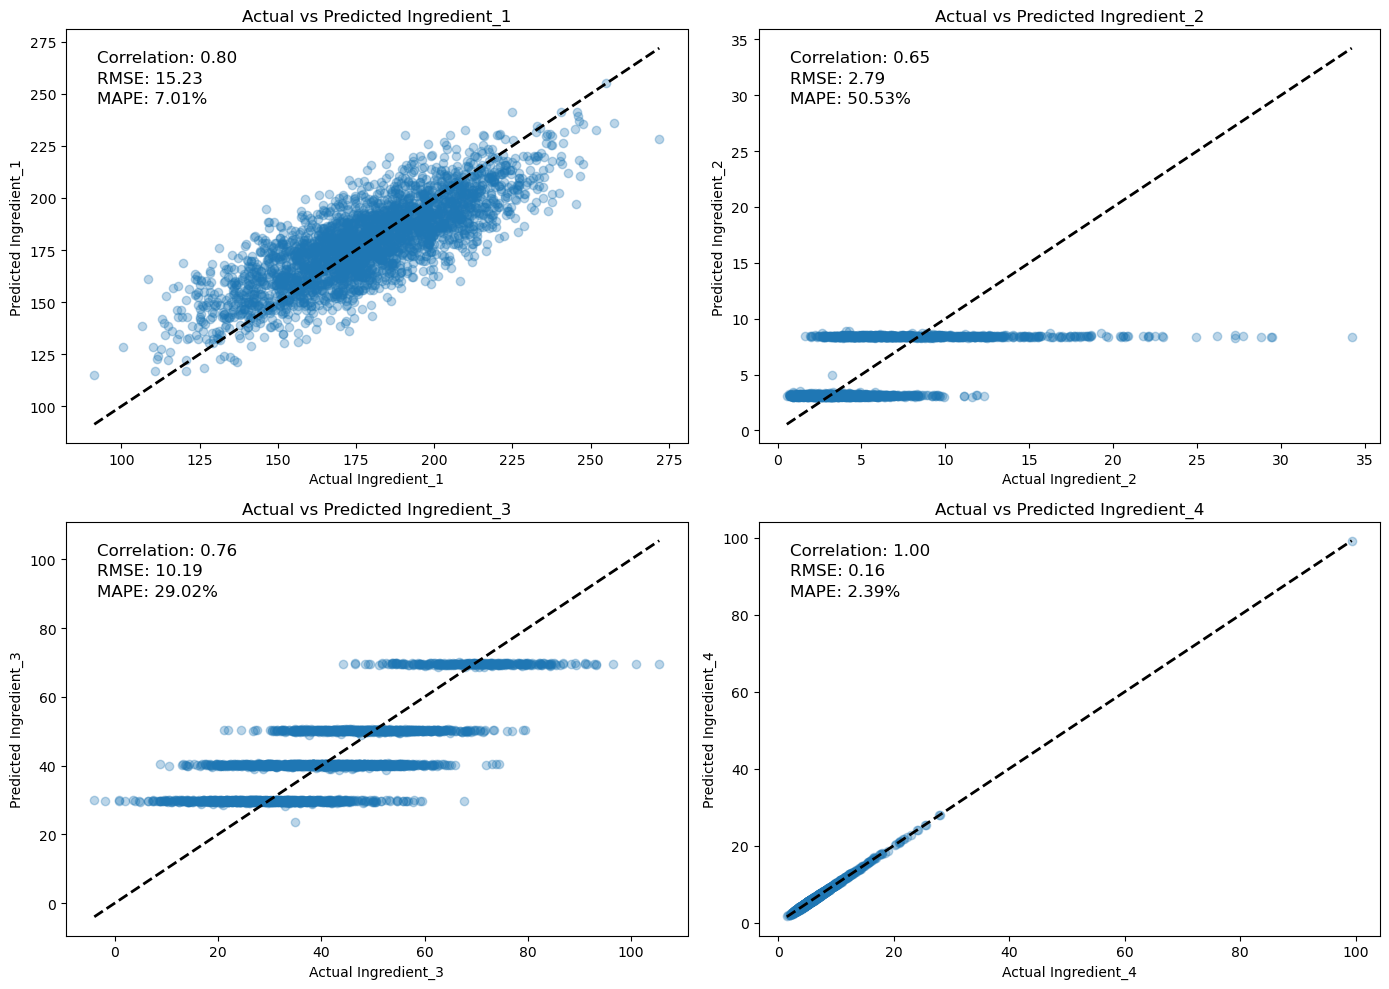

In [335]:
print("Linear Regression Model")
lr_model = LinearRegression()
lr_model, y_train_pred_lr, y_test_pred_lr = train_model(lr_model, X_train, y_train, X_test, y_test)
evaluate_and_visualize_model(y_train, y_train_pred_lr, y_test, y_test_pred_lr, ingredients)


In [336]:
# Model coefficients
import pandas as pd

# Assuming lr_model is the trained LinearRegression model
coefficients = lr_model.coef_

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame(coefficients, columns=X.columns, index=['Ingredient_1', 'Ingredient_2', 'Ingredient_3', 'Ingredient_4'])

print("Coefficients for each ingredient:")
coefficients_df


Coefficients for each ingredient:


Age    Income  Gender_Male  Education_High School  \
Ingredient_1  19.920963  0.037987     0.226007               0.346304   
Ingredient_2  -0.039147  0.046332     2.441876               0.007756   
Ingredient_3  -0.130561 -0.169139    -0.054965              -4.822237   
Ingredient_4   1.004108  2.547943     0.002258              -0.004762   

              Education_Masters  Education_PhD  
Ingredient_1           0.025305      -0.082424  
Ingredient_2          -0.006056       0.007629  
Ingredient_3           3.972185       8.933209  
Ingredient_4           0.001669       0.001385

## Random Forest 


Random Forest Model with Hyperparameter Tuning
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Training Mean Squared Error for each ingredient: [166.88742417   7.52031094  82.38180978   0.92372256]
Training Root Mean Squared Error for each ingredient: [12.91849156  2.74231853  9.07644257  0.96110486]
Training Mean Absolute Percentage Error: 22.800851451684103
Training R^2 Score: 0.7038529735523529
Test Mean Squared Error for each ingredient: [243.82309571   8.54825524 109.24603116   3.90783526]
Test Root Mean Squared Error for each ingredient: [15.61483576  2.92373994 10.45208262  1.97682454]
Test Mean Absolute Percentage Error: 25.103531512549353
Test R^2 Score: 0.5947595223753175


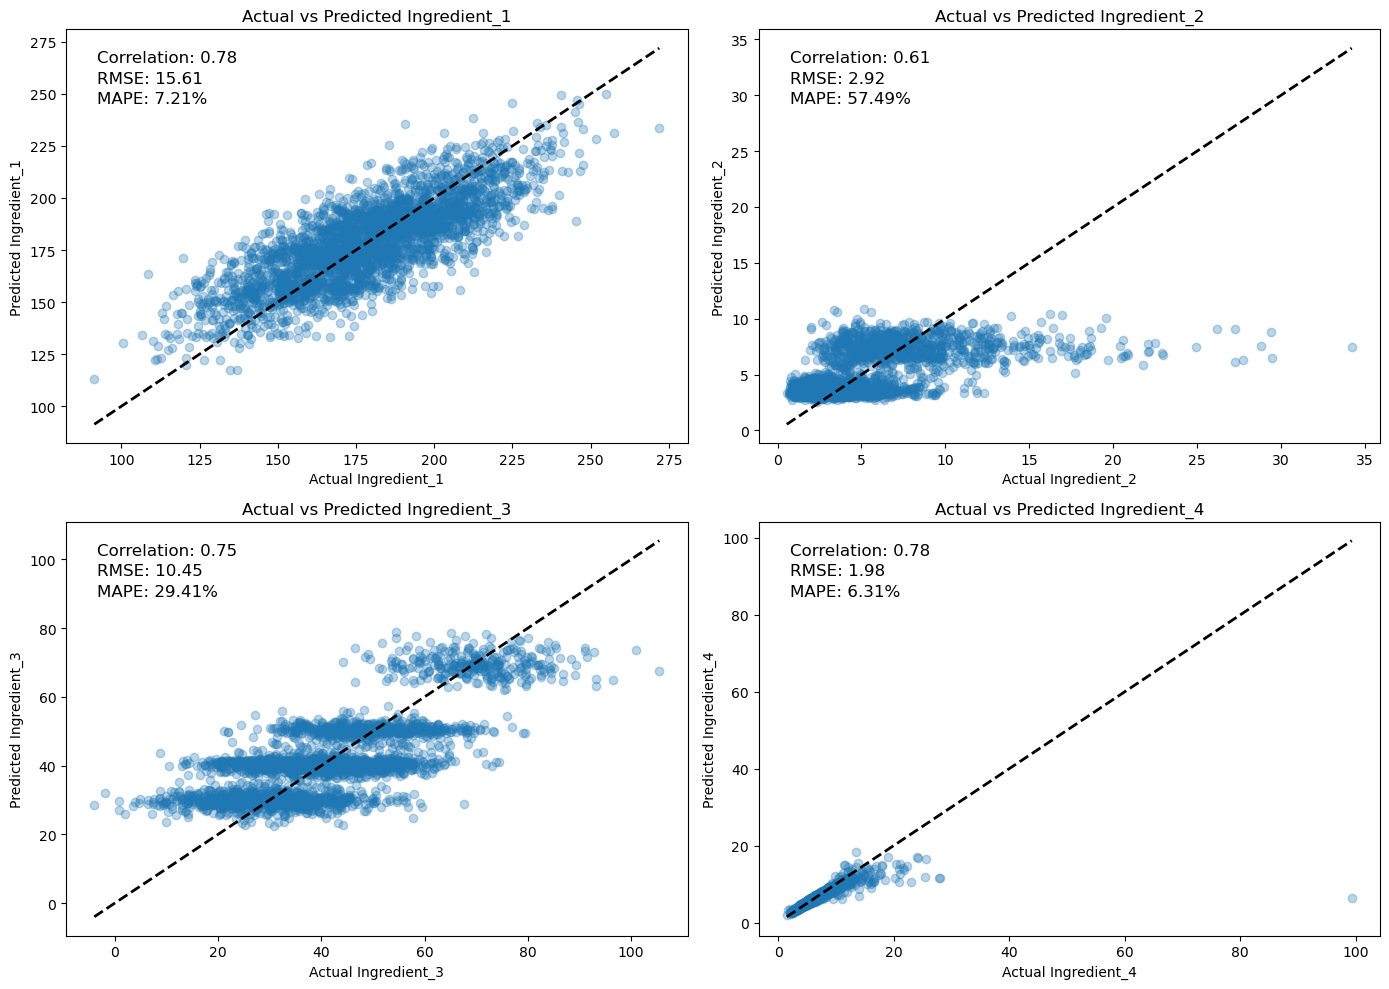

In [332]:
print("\nRandom Forest Model with Hyperparameter Tuning")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print("Best Parameters for Random Forest:", grid_search.best_params_)

best_rf_model, y_train_pred_rf, y_test_pred_rf = train_model(best_rf_model, X_train, y_train, X_test, y_test)
evaluate_and_visualize_model(y_train, y_train_pred_rf, y_test, y_test_pred_rf, ingredients)


In [338]:
# Assuming best_rf_model is the trained Random Forest model
import pandas as pd

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display the feature importances for each ingredient
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature importances for Random Forest model:")
feature_importance_df

Feature importances for Random Forest model:


Feature  Importance
0                    Age    0.665180
5          Education_PhD    0.139558
1                 Income    0.096139
3  Education_High School    0.059195
4      Education_Masters    0.024757
2            Gender_Male    0.015170

# Consolidate and Export to Excel

In [265]:
# Initialize columns for predictions
df_combined['Set'] = None
df_combined['LR_Pred_Ingredient_1'] = np.nan
df_combined['LR_Pred_Ingredient_2'] = np.nan
df_combined['LR_Pred_Ingredient_3'] = np.nan
df_combined['LR_Pred_Ingredient_4'] = np.nan
df_combined['RF_Pred_Ingredient_1'] = np.nan
df_combined['RF_Pred_Ingredient_2'] = np.nan
df_combined['RF_Pred_Ingredient_3'] = np.nan
df_combined['RF_Pred_Ingredient_4'] = np.nan

# Add training predictions to df_combined
df_combined.loc[train_indices, 'Set'] = 'Train'
df_combined.loc[train_indices, 'LR_Pred_Ingredient_1'] = y_train_pred_lr[:, 0]
df_combined.loc[train_indices, 'LR_Pred_Ingredient_2'] = y_train_pred_lr[:, 1]
df_combined.loc[train_indices, 'LR_Pred_Ingredient_3'] = y_train_pred_lr[:, 2]
df_combined.loc[train_indices, 'LR_Pred_Ingredient_4'] = y_train_pred_lr[:, 3]
df_combined.loc[train_indices, 'RF_Pred_Ingredient_1'] = y_train_pred_rf[:, 0]
df_combined.loc[train_indices, 'RF_Pred_Ingredient_2'] = y_train_pred_rf[:, 1]
df_combined.loc[train_indices, 'RF_Pred_Ingredient_3'] = y_train_pred_rf[:, 2]
df_combined.loc[train_indices, 'RF_Pred_Ingredient_4'] = y_train_pred_rf[:, 3]

# Add testing predictions to df_combined
df_combined.loc[test_indices, 'Set'] = 'Test'
df_combined.loc[test_indices, 'LR_Pred_Ingredient_1'] = y_test_pred_lr[:, 0]
df_combined.loc[test_indices, 'LR_Pred_Ingredient_2'] = y_test_pred_lr[:, 1]
df_combined.loc[test_indices, 'LR_Pred_Ingredient_3'] = y_test_pred_lr[:, 2]
df_combined.loc[test_indices, 'LR_Pred_Ingredient_4'] = y_test_pred_lr[:, 3]
df_combined.loc[test_indices, 'RF_Pred_Ingredient_1'] = y_test_pred_rf[:, 0]
df_combined.loc[test_indices, 'RF_Pred_Ingredient_2'] = y_test_pred_rf[:, 1]
df_combined.loc[test_indices, 'RF_Pred_Ingredient_3'] = y_test_pred_rf[:, 2]
df_combined.loc[test_indices, 'RF_Pred_Ingredient_4'] = y_test_pred_rf[:, 3]


In [266]:
# Export the consolidated DataFrame to Excel
df_combined.to_excel('model_predictions.xlsx', sheet_name='Predictions', index=False)
